### **Problem Statement**

Model that predicts whether the bank should approve client's loan based on his/her profit using a neural network

In [285]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import BinaryCrossentropy, SparseCategoricalCrossentropy, Precision
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [286]:
# Importing the data
data = pd.read_csv("loan_data.csv")

In [287]:
# Summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [288]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [289]:
# View the first 5 rows 
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [290]:
# Checking for null values
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [291]:
purposes = data["purpose"].unique()

In [292]:
# Encode categorical data
one_hot = OneHotEncoder(handle_unknown="ignore")
enc_data = pd.DataFrame(one_hot.fit_transform(data[['purpose']]).toarray(), columns=data["purpose"].unique())

In [293]:
# Rearrange previous data with encoded data
enc_data = pd.concat([data.drop("purpose", axis=1), enc_data], axis=1)

### Data Visualization

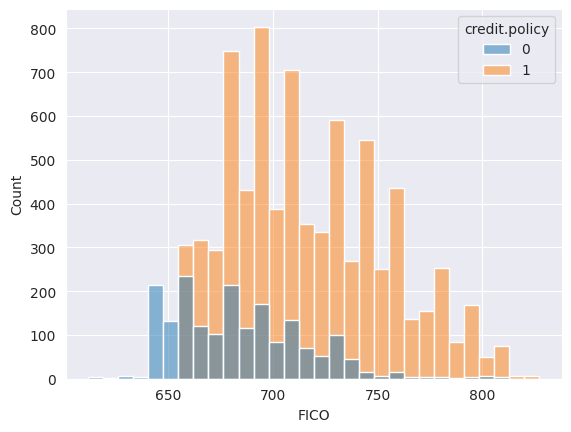

In [294]:
# Fico vs count
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.histplot(data=data, x=data["fico"], bins=30, hue="credit.policy")
ax.set_xlabel("FICO");

<Axes: xlabel='purpose', ylabel='count'>

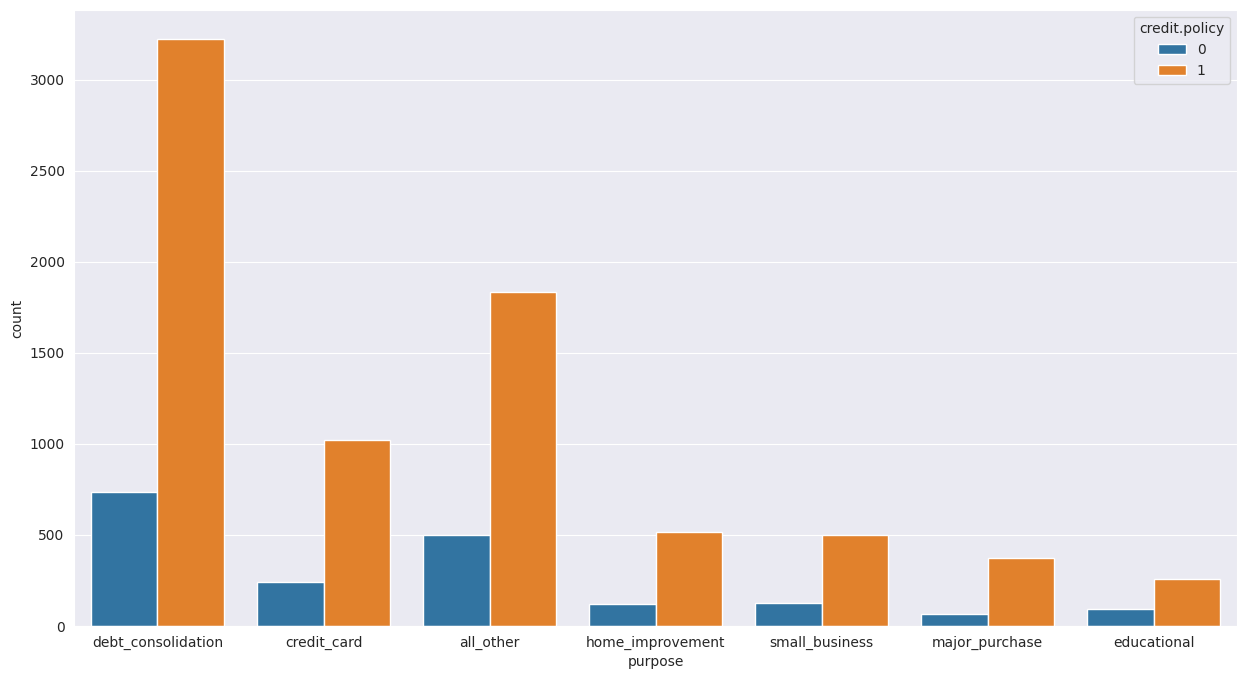

In [295]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=data, x="purpose", hue="credit.policy")

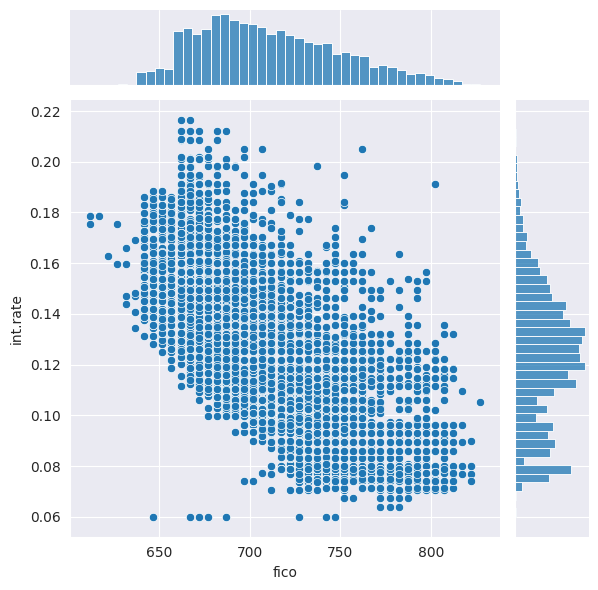

In [296]:
# Checking the trent between FICO and interest rate
sns.jointplot(data=data, x="fico", y="int.rate");

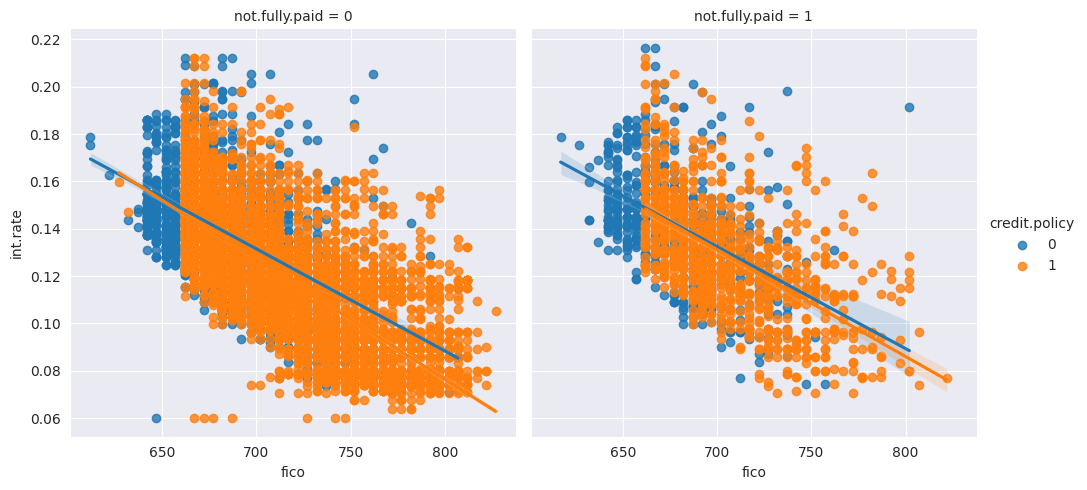

In [297]:
# understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=data, x="fico", y="int.rate", hue="credit.policy", col="not.fully.paid");

### Building the neural network

In [298]:
# Define sigmoid function externally
def my_sigmoid(z):
  y = 1 / (1 + np.exp(-z))
  return y

In [299]:
def predict_(y):
  m = y.shape[0]
  y_ = np.zeros(m,)

  for i in range(len(y)):
      if (y[i] >= 0.5):
        y_[i] = 1
      else:
        y_[i] = 0

  return y_

In [300]:
X = enc_data.drop("not.fully.paid", axis=1)
y = enc_data["not.fully.paid"]

In [301]:
# Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.33)

In [302]:
# Define the neural network
tf.random.set_seed(1234)
model = Sequential(
    [               
        Dense(50, activation="linear", name="layer1"),
        Dense(30, activation="linear", name="layer2"),
        Dense(10, activation="linear", name="layer3"),
        Dense(1, activation="linear", name="layer4")
    ], name = "my_model" 
)

In [304]:
# Compile and Fit the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    np.array(X_train), np.array(y_train).reshape(-1, 1),
    epochs=2000
)

Epoch 1/2000
201/201 [==============================] - 2s 2ms/step - loss: 90.5708
Epoch 2/2000
201/201 [==============================] - 0s 2ms/step - loss: 103.0870
Epoch 3/2000
201/201 [==============================] - 0s 2ms/step - loss: 101.1701
Epoch 4/2000
201/201 [==============================] - 0s 2ms/step - loss: 55.3960
Epoch 5/2000
201/201 [==============================] - 0s 2ms/step - loss: 67.8601
Epoch 6/2000
201/201 [==============================] - 0s 2ms/step - loss: 48.9239
Epoch 7/2000
201/201 [==============================] - 0s 2ms/step - loss: 42.7071
Epoch 8/2000
201/201 [==============================] - 0s 2ms/step - loss: 58.6322
Epoch 9/2000
201/201 [==============================] - 0s 2ms/step - loss: 67.5013
Epoch 10/2000
201/201 [==============================] - 0s 2ms/step - loss: 40.1535
Epoch 11/2000
201/201 [==============================] - 0s 2ms/step - loss: 53.4083
Epoch 12/2000
201/201 [==============================] - 0s 2ms/step - l

In [305]:
y_temp = model.predict(np.array(X_test))

99/99 [==============================] - 0s 1ms/step


In [306]:
y_preds = predict_(my_sigmoid(y_temp.reshape(y_temp.shape[0],)))

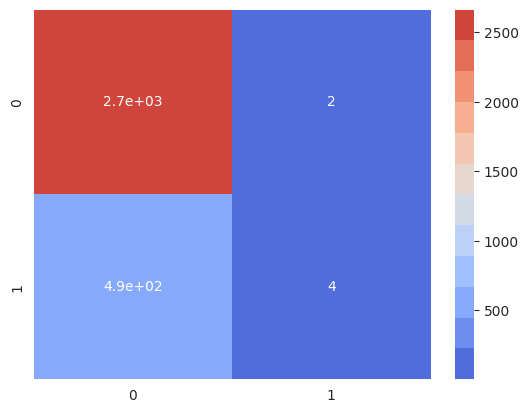

In [309]:
# Confusion Matrix
con_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(data=con_mat, cmap=sns.color_palette("coolwarm", 12), annot=True);

In [308]:
accuracy_score(y_test, y_preds)

0.8440366972477065

In [311]:
report_dict = classification_report(y_test, y_preds, output_dict=True)
pd.DataFrame(report_dict)

,0,1,accuracy,macro avg,weighted avg
precision,0.844374,0.666667,0.844037,0.755520,0.816546
recall,0.999250,0.008081,0.844037,0.503665,0.844037
f1-score,0.915307,0.015968,0.844037,0.465637,0.774474
support,2666.000000,495.000000,0.844037,3161.000000,3161.000000


**We Found that the Best Model for this DataSet is a Neural Network with 4 layers with Accuracy of 84%.**